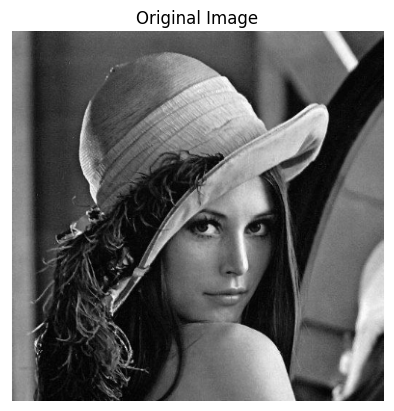

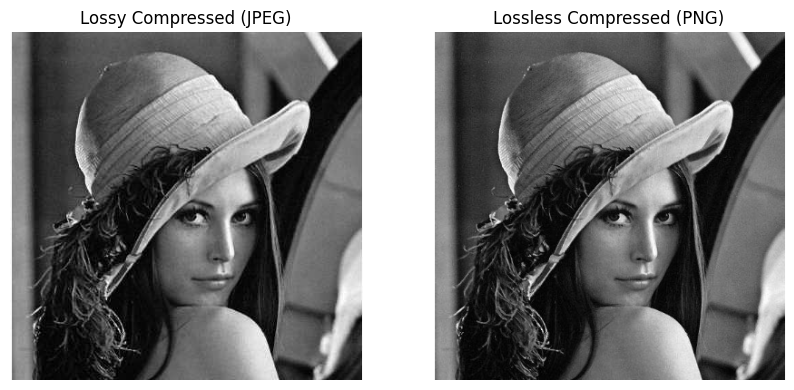

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image_path = "/content/Image.png"  # Replace with actual image path
image = cv2.imread(image_path)

# Display Original Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1.1 Lossy Compression (JPEG)
jpeg_path = "compressed_image.jpg"
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 50% quality

# 1.2 Lossless Compression (PNG)
png_path = "compressed_image.png"
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])  # Max lossless compression

# Display Compressed Images
jpeg_image = cv2.imread(jpeg_path)
png_image = cv2.imread(png_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Lossy Compressed (JPEG)")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Lossless Compressed (PNG)")
axs[1].axis('off')

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.9123 - loss: 0.2882 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9853 - val_loss: 0.0401
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9901 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9912 - val_loss: 0.0271
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9912 - val_loss: 0.0271
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
MNIST - Accuracy: 0.9912
MNIST - Precision: 0.9912
MNIST - Recall: 0.9912
MNIST - F1 Score: 0.9912
MNIST - Confusion Matrix:
[[ 973    1    1    0    0    2    0    1    1    1]
 [   0 1126    0    0    1    2    2    2    2    0]
 [   0    0 1024    1    1    0    0    5    1    0]
 [   0    0    1 100

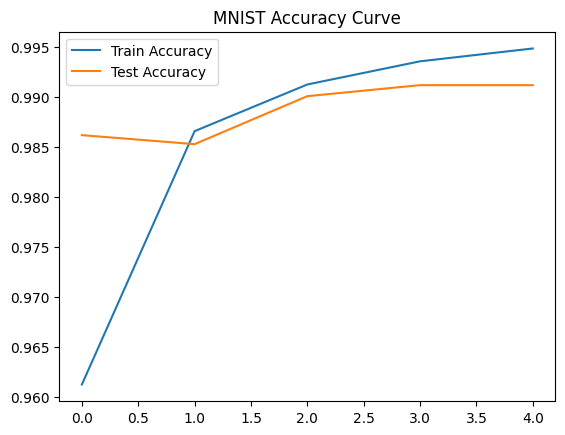

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize Images
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to range 0-1

# Expand dimensions for CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model (80-20 Split)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display Metrics
print(f"MNIST - Accuracy: {accuracy:.4f}")
print(f"MNIST - Precision: {precision:.4f}")
print(f"MNIST - Recall: {recall:.4f}")
print(f"MNIST - F1 Score: {f1:.4f}")
print(f"MNIST - Confusion Matrix:\n{conf_matrix}")

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('MNIST Accuracy Curve')
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.4147 - loss: 1.6170 - val_accuracy: 0.5968 - val_loss: 1.1587
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6289 - loss: 1.0684 - val_accuracy: 0.6667 - val_loss: 0.9908
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6838 - loss: 0.9069 - val_accuracy: 0.6875 - val_loss: 0.9130
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7273 - loss: 0.7843 - val_accuracy: 0.7051 - val_loss: 0.8735
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7593 - loss: 0.6956 - val_accuracy: 0.6921 - val_loss: 0.8942
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
CIFAR-10 - Accuracy: 0.6921
CIFAR-10 - Precision: 0.6987
CIFAR-10 - Recall: 0.6921
CIFAR-10 - F1 Score: 0.6921
CIFAR-10 - Confusion Matrix:
[[646  33  60  11  27  18   8  24 125  48]
 [ 11 848  13   9   4  10   7   7  21  70]
 [ 53   8 621  47  77 102  31  40  13   8]
 [ 27  17  87 467  70 239  30  35 

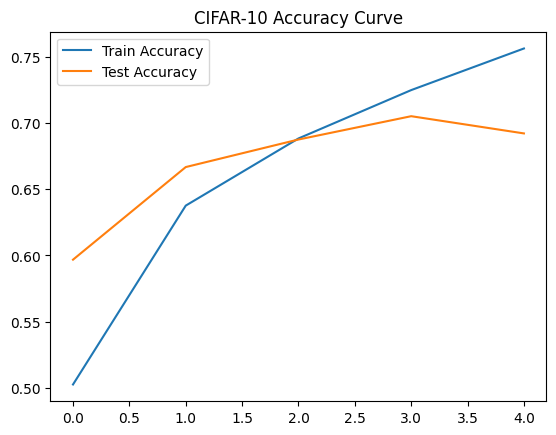

In [ ]:
# Load CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Images
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to range 0-1

# Define CNN Model
model_cifar = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history_cifar = model_cifar.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate Model
y_pred_cifar = model_cifar.predict(X_test)
y_pred_classes_cifar = np.argmax(y_pred_cifar, axis=1)

# Compute Metrics
accuracy_cifar = accuracy_score(y_test, y_pred_classes_cifar)
precision_cifar = precision_score(y_test, y_pred_classes_cifar, average='weighted')
recall_cifar = recall_score(y_test, y_pred_classes_cifar, average='weighted')
f1_cifar = f1_score(y_test, y_pred_classes_cifar, average='weighted')
conf_matrix_cifar = confusion_matrix(y_test, y_pred_classes_cifar)

# Display Metrics
print(f"CIFAR-10 - Accuracy: {accuracy_cifar:.4f}")
print(f"CIFAR-10 - Precision: {precision_cifar:.4f}")
print(f"CIFAR-10 - Recall: {recall_cifar:.4f}")
print(f"CIFAR-10 - F1 Score: {f1_cifar:.4f}")
print(f"CIFAR-10 - Confusion Matrix:\n{conf_matrix_cifar}")

# Plot Accuracy Curve
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Test Accuracy')
plt.title('CIFAR-10 Accuracy Curve')
plt.legend()
plt.show()
